In [214]:
import osmnx as ox

import pandas as pd 

import networkx as nx

import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [215]:
cph = (55.6867243, 12.5700724)

G = ox.graph_from_point(cph, distance=1000, network_type='drive')

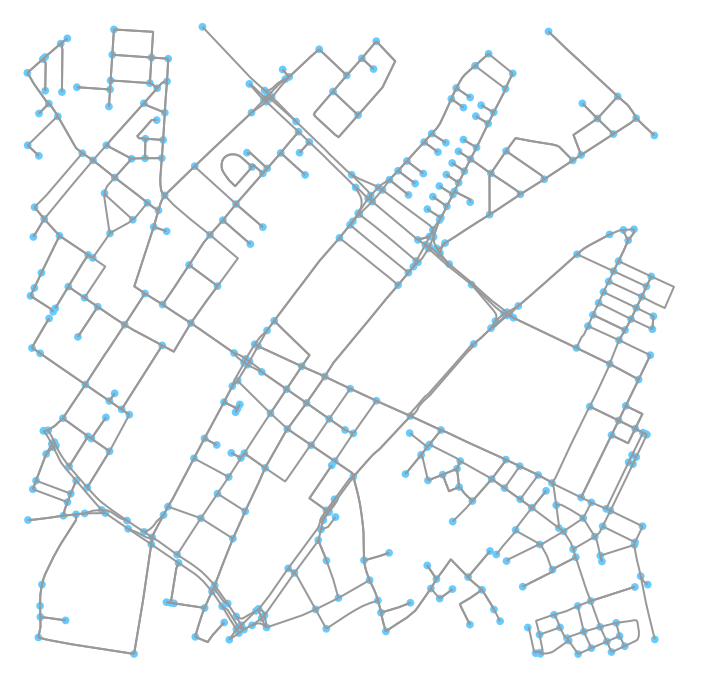

(<Figure size 790.065x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22edfaa5c08>)

In [216]:
ox.plot_graph(G)

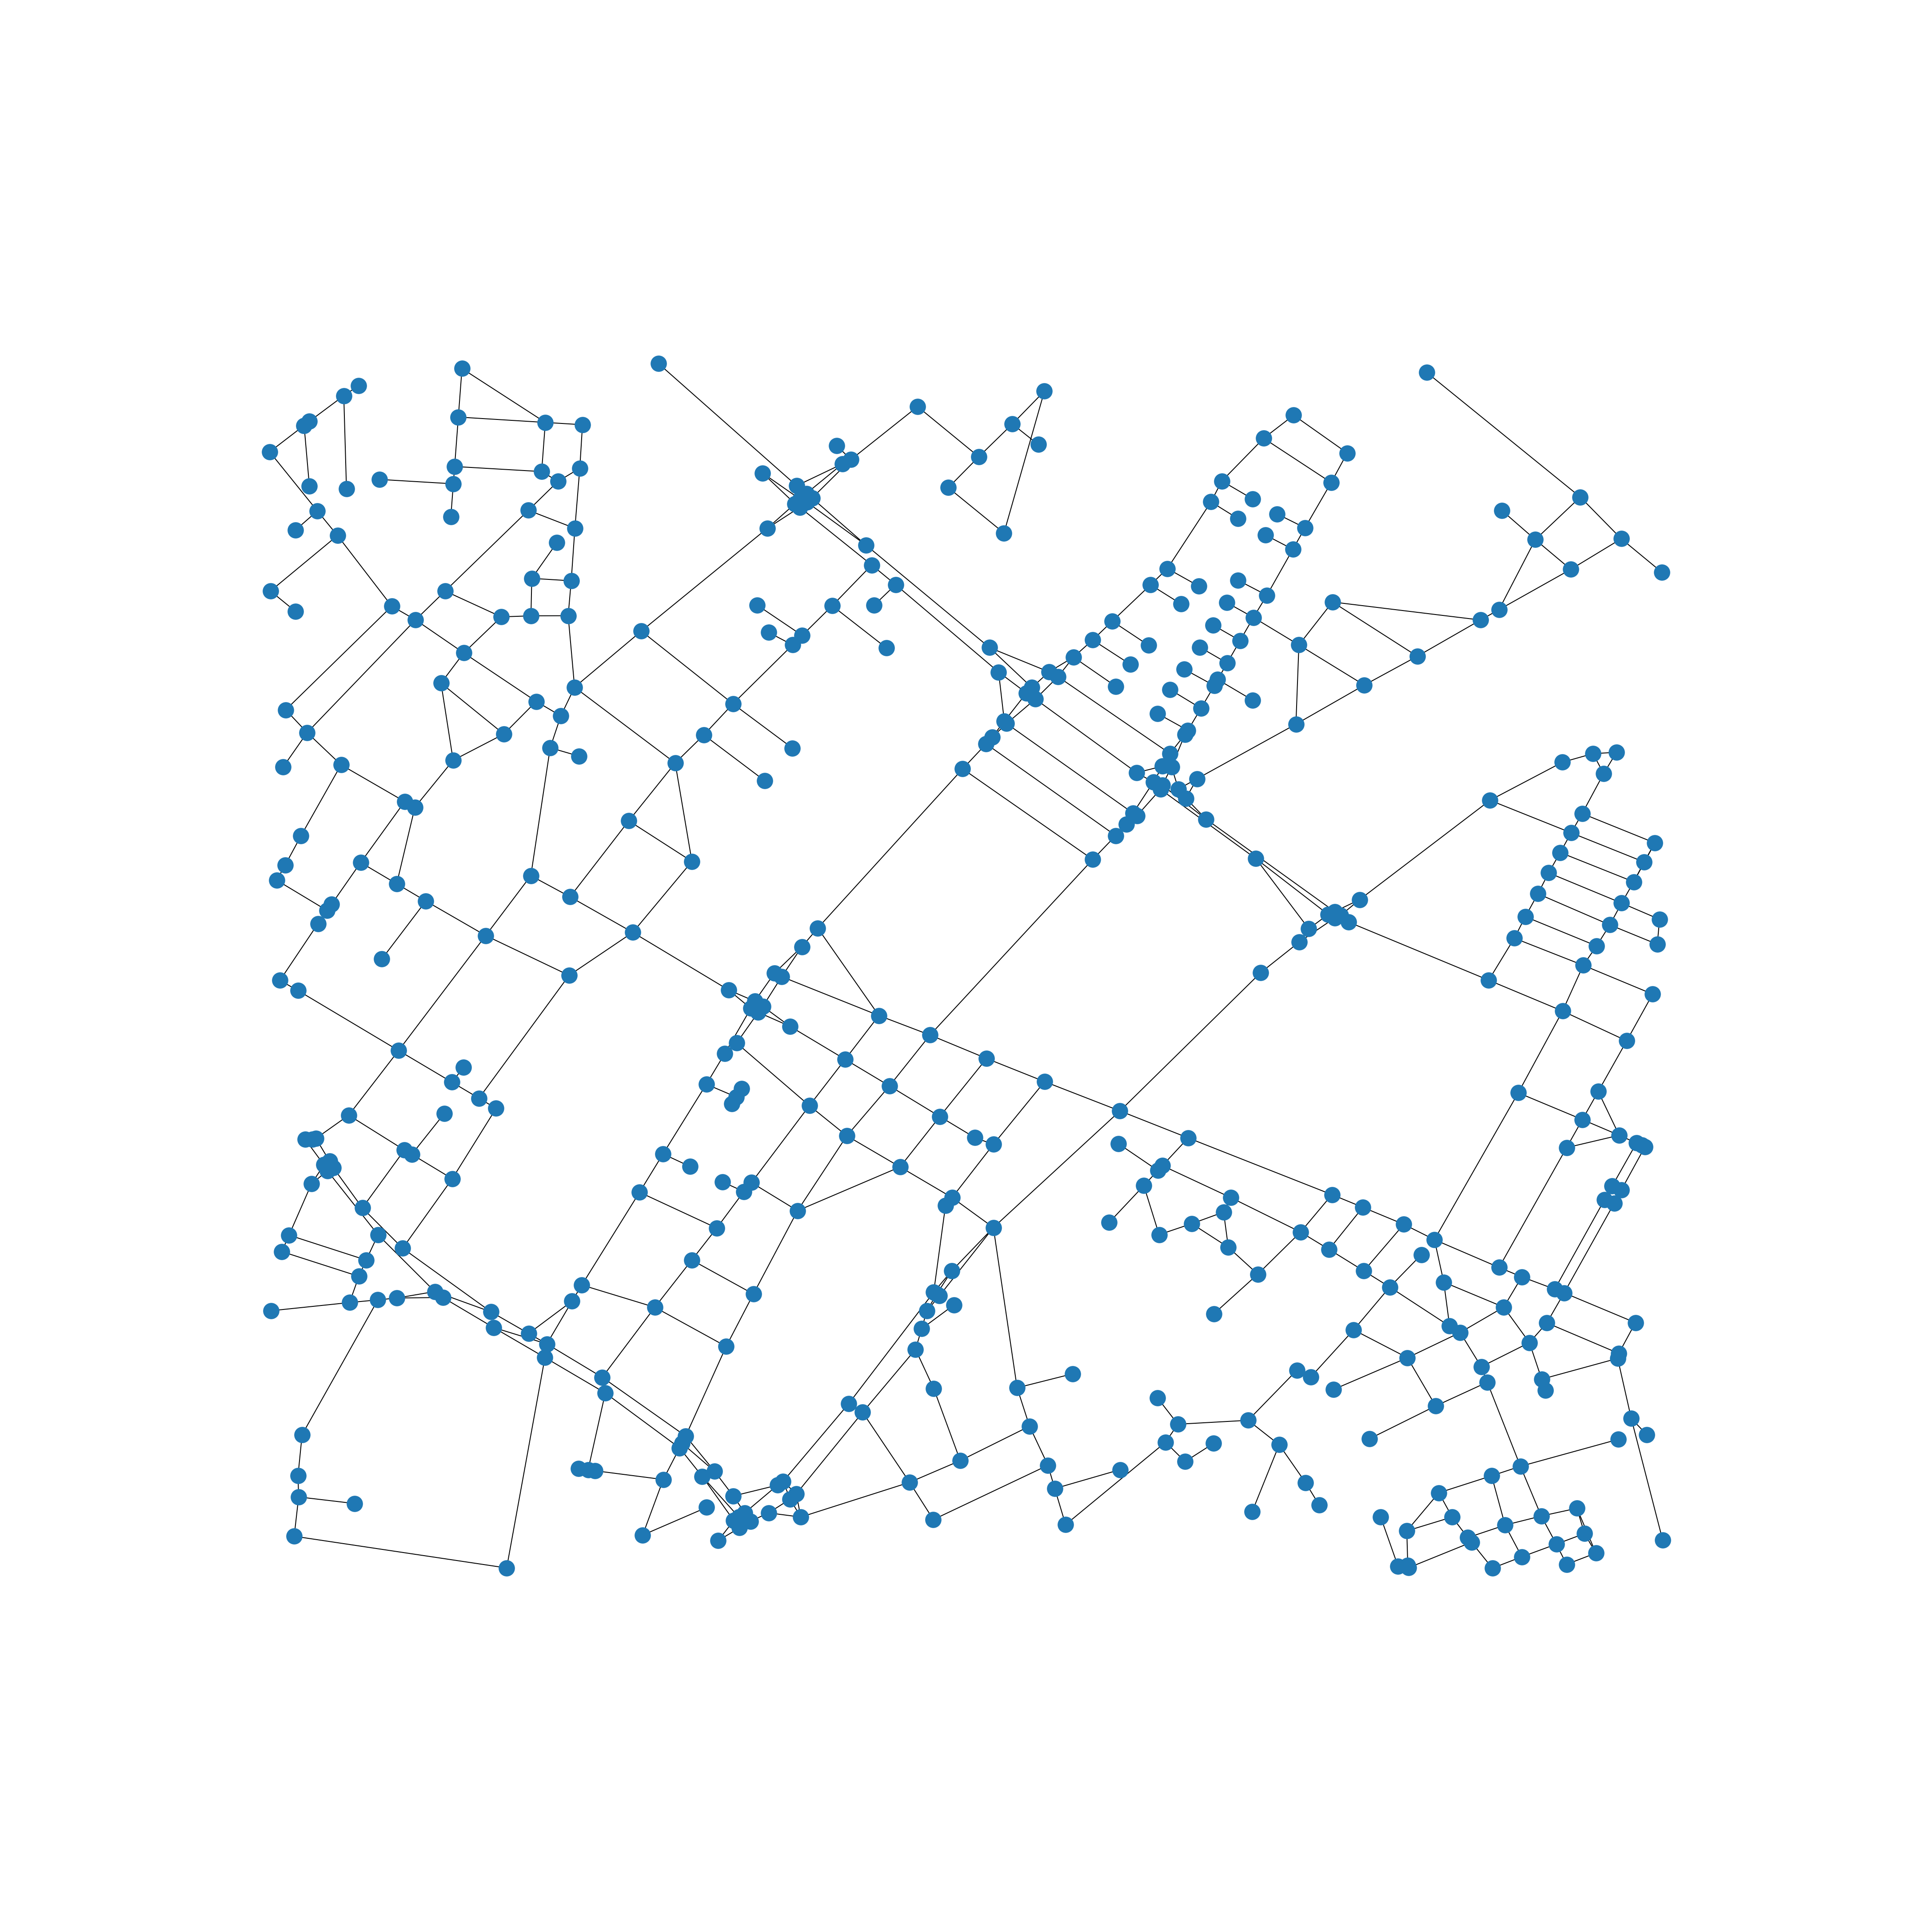

In [217]:
def get_city(point, distance):
    # Imports the a given city from point and distance around the point. 
    G_ox = ox.graph_from_point(point, distance=distance, network_type='drive')

    # Creates a nx Graph and inputs the node with positional data and edge weigts 
    G = nx.Graph()
    for n in G_ox.nodes:
        x = G_ox.nodes(data=True)[n]["x"] - point[1]
        y = G_ox.nodes(data=True)[n]["y"] - point[0]
        G.add_node(n, pos=(x, y))
    for e in G_ox.edges:
        G.add_edge(e[0], e[1])
    for e in G_ox.edges:
        G[e[0]][e[1]]['weight'] = G_ox.get_edge_data(e[0], e[1])[0]["length"]

    # returns the nx graph
    
    return G


G = get_city((55.6867243, 12.5700724), 1000)

pos=nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(30, 30))
nx.draw(G, pos)


In [208]:
nx.to_numpy_matrix(G, weight=None)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]])